In [ ]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_records = 1000
num_devices = 50
start_date = datetime(2022, 1, 1)
end_date = datetime(2024, 1, 1)

# Generate device IDs
device_ids = [f"device_{i+1}" for i in range(num_devices)]

# Generate random timestamps within the given range
def generate_random_timestamps(n, start_date, end_date):
    time_diff = end_date - start_date
    random_dates = [start_date + timedelta(days=random.uniform(0, time_diff.days)) for _ in range(n)]
    return random_dates

# Generate the dataset
data = []
for _ in range(num_records):
    device_id = random.choice(device_ids)
    timestamp = random.choice(generate_random_timestamps(1, start_date, end_date))
    usage_hours = np.random.uniform(0, 24)
    temperature = np.random.uniform(15, 35)
    humidity = np.random.uniform(20, 80)
    vibration = np.random.uniform(0, 1)
    error_rate = np.random.uniform(0, 0.05)
    maintenance_needed = np.random.choice([0, 1], p=[0.95, 0.05])

    data.append([device_id, timestamp, usage_hours, temperature, humidity, vibration, error_rate, maintenance_needed])

# Create DataFrame
columns = ["DeviceID", "Timestamp", "UsageHours", "Temperature", "Humidity", "Vibration", "ErrorRate", "MaintenanceNeeded"]
df = pd.DataFrame(data, columns=columns)

# Sort by Timestamp for better readability
df.sort_values(by="Timestamp", inplace=True)

# Save to CSV
df.to_csv("healthcare_equipment_maintenance_data.csv", index=False)

print("Dataset generated and saved to 'healthcare_equipment_maintenance_data.csv'.")


Dataset generated and saved to 'healthcare_equipment_maintenance_data.csv'.


    DeviceID Timestamp  UsageHours  Temperature   Humidity  Vibration  \
0  device_34   23:03.4    0.608418    34.252968  70.158807   0.695974   
1  device_33   25:26.8    7.230366    26.967150  37.834268   0.299919   
2  device_39   30:16.6   16.131253    30.232392  34.258253   0.728216   
3  device_35   07:54.4   10.012642    18.204512  30.256184   0.418145   
4  device_16   58:28.4   13.935485    33.718745  60.335041   0.481278   

   ErrorRate  MaintenanceNeeded  
0   0.020448                  0  
1   0.037160                  0  
2   0.018389                  0  
3   0.037864                  0  
4   0.040484                  1  
Accuracy: 0.945
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       189
           1       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.89      0.94      0.92       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


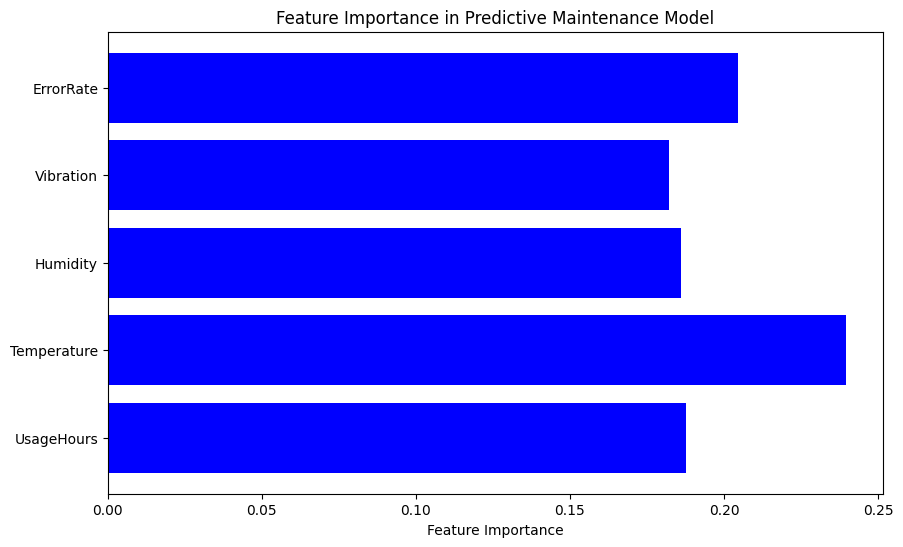

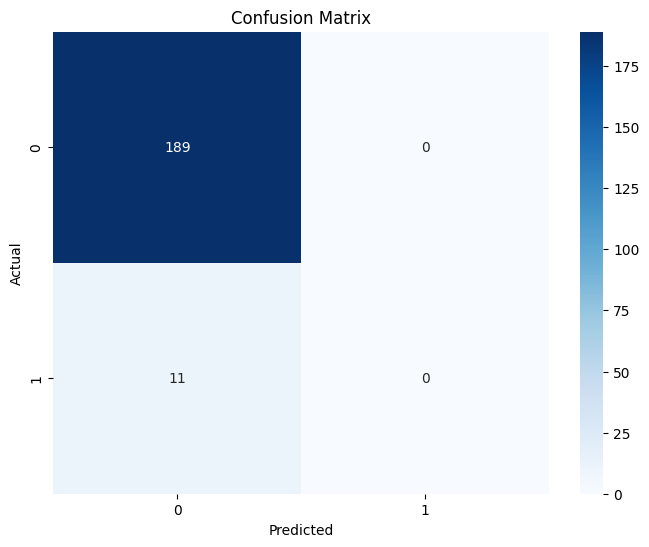

    DeviceID Timestamp  UsageHours  Temperature   Humidity  Vibration  \
0  device_34   23:03.4    0.608418    34.252968  70.158807   0.695974   
1  device_33   25:26.8    7.230366    26.967150  37.834268   0.299919   
2  device_39   30:16.6   16.131253    30.232392  34.258253   0.728216   
3  device_35   07:54.4   10.012642    18.204512  30.256184   0.418145   
4  device_16   58:28.4   13.935485    33.718745  60.335041   0.481278   

   ErrorRate  MaintenanceNeeded  
0   0.020448                  0  
1   0.037160                  0  
2   0.018389                  0  
3   0.037864                  0  
4   0.040484                  1  
Email sent successfully.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

# Load the dataset
data = pd.read_csv('/content/healthcare_equipment_maintenance_data (2).csv')

# Display the first few rows of the dataset
print(data.head())

# Select features and target variable
features = data[['UsageHours', 'Temperature', 'Humidity', 'Vibration', 'ErrorRate']]
target = data['MaintenanceNeeded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance Visualization
feature_importances = model.feature_importances_
feature_names = features.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='b', align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predictive Maintenance Model')
plt.show()

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the model for future use
joblib.dump(model, 'predictive_maintenance_model.pkl')

# Load the model (example for deployment)
model = joblib.load('predictive_maintenance_model.pkl')

# Load the new data for prediction
new_data = pd.read_csv('/content/healthcare_equipment_maintenance_data (2).csv')

# Display the first few rows of the new dataset to verify
print(new_data.head())

# Select features for the new data
new_features = new_data[['UsageHours', 'Temperature', 'Humidity', 'Vibration', 'ErrorRate']]

# Standardize the feature values
new_features_scaled = scaler.transform(new_features)

# Make predictions on the new data
new_predictions = model.predict(new_features_scaled)

# Check for machines that need maintenance
maintenance_needed_indices = new_data[new_predictions == 1].index

if not maintenance_needed_indices.empty:
    # Notify the maintenance team
    def send_email(device_ids):
        sender_email = "aathish023@gmail.com"
        receiver_email = "yamunaselvam1831@gmail.com"
        password = " iuer kkoo cxta qcxr"
        smtp_server = "smtp.gmail.com"  # Update with your SMTP server
        smtp_port = 587  # Update with your SMTP port if different

        subject = "Machine Maintenance Alert"
        body = f"The following devices need maintenance:\n\n{device_ids}"

        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = receiver_email
        msg['Subject'] = subject

        msg.attach(MIMEText(body, 'plain'))

        try:
            server = smtplib.SMTP(smtp_server, smtp_port)
            server.starttls()
            server.login(sender_email, password)
            text = msg.as_string()
            server.sendmail(sender_email, receiver_email, text)
            server.quit()
            print("Email sent successfully.")
        except smtplib.SMTPException as e:
            print(f"Failed to send email. SMTPException: {e}")
        except Exception as e:
            print(f"Failed to send email. Error: {e}")

    device_ids = new_data.loc[maintenance_needed_indices, 'DeviceID'].tolist()
    send_email(device_ids)
else:
    print("No maintenance needed for any devices at this moment.")
